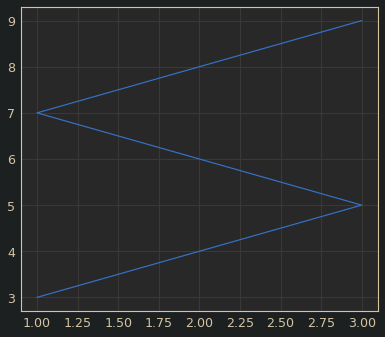

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot


jtplot.style(theme='gruvboxd')
x = np.array([1, 2, 3, 1, 2, 3])
y = np.array([3, 4, 5, 7, 8, 9])

# plt.plot(x, y)

# ax = plt.subplot(); ax.plot(x, y)
# ax = plt.subplot(111); ax.plot(x, y)

fig, ax = plt.subplots(); ax.plot(x, y)
# fig, ax = plt.subplots(1, 1); ax.plot(x, y)

""" first is error! """
# fig = plt.figure(); ax = fig.add_subplot(); ax.plot(x, y)
# fig = plt.figure(); ax = fig.add_subplot(111); ax.plot(y)


plt.show()